In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn import linear_model
import warnings

In [2]:
# Read the first sheet (index 0) into a pandas DataFrame
#assessment 1 
df = pd.read_excel(r"C:\Users\rajha\Downloads\Data set.xlsx", sheet_name=0)

In [4]:
df

,CPI,discounts,offers,Sales
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,5,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CPI        6 non-null      int64
 1   discounts  6 non-null      int64
 2   offers     6 non-null      int64
 3   Sales      6 non-null      int64
dtypes: int64(4)
memory usage: 324.0 bytes


In [6]:
#display summary statis
df.describe()

,CPI,discounts,offers,Sales
count,6.000000,6.000000,6.000000,6.000000
mean,3416.666667,4.333333,16.500000,648333.333333
std,587.934237,1.211060,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.250000,9.750000,572500.000000
50%,3400.000000,4.500000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [7]:
# Fitting the linear model
x = df[['CPI', 'discounts', 'offers']]
y = df.Sales

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 0,test_size=0.25)

In [9]:
regr = linear_model.LinearRegression()
regr.fit(x,y)
y_pred = regr.predict(x)
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred))) #95% good model

R squared: 0.9517053277318955


In [10]:
#mean of residuals - close to zero --> one of the assumption to see
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -5.820766091346741e-11


In [11]:
y_pred

array([518401.04171196, 600201.34257367, 617094.24971522, 597810.70928584,
       768867.81214403, 787624.84456927])

In [12]:
residuals

array([ 31598.95828804, -35201.34257367,  -7094.24971522,  -2810.70928584,
        -8867.81214403,  22375.15543073])

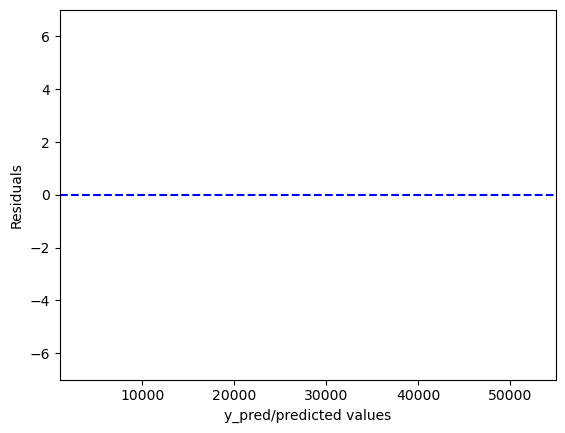

In [13]:
# Create a scatter plot
#plt.scatter(y_pred, residuals)
p = sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-7, 7)
plt.xlim(1000, 55000)  # Adjust x-axis limits based on your data
# Add a reference line at y=0
plt.axhline(y=0, color='blue', linestyle='--')

C:\Users\rajha\AppData\Local\Temp\ipykernel_13720\3040778317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


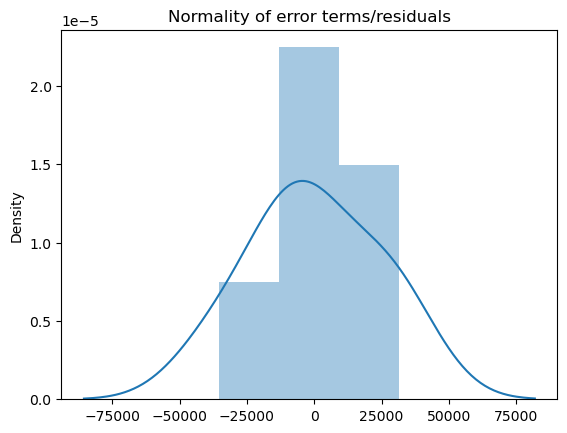

In [14]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [15]:
df.corr()*100 #disc, sales, cpi has high correlation

,CPI,discounts,offers,Sales
CPI,100.000000,66.477186,-44.529992,90.147643
discounts,66.477186,100.000000,-81.690165,82.987720
offers,-44.529992,-81.690165,100.000000,-73.416658
Sales,90.147643,82.987720,-73.416658,100.000000


In [16]:
#lets build a model using smf 
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = "Sales ~ CPI + offers + discounts", data = df) #95% best model
res = model.fit()
print(res.summary())  


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     13.14
Date:                Sat, 27 Jan 2024   Prob (F-statistic):             0.0716
Time:                        17:41:12   Log-Likelihood:                -68.476
No. Observations:                   6   AIC:                             145.0
Df Residuals:                       2   BIC:                             144.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.648e+05   1.64e+05      1.613      0.2

C:\Users\rajha\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [17]:
#using smf -> predicting the sales 
#5000 cpi , 3 percentage discounts, 20 offers
128.43512778*5000 + 5913.51964731*3 -4902.54602054*20 + 264780.07095467084


826645.3483858006

In [18]:
#another easy method using linear_model
x = df[['CPI','discounts', 'offers']]
y = df['Sales']

# import model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [19]:
model.coef_

array([  128.43512778,  5913.51964731, -4902.54602054])

In [20]:
model.intercept_

264780.07095467084

In [21]:
#predicting the sales using linear model gives the same answer as smf model 
#5000 cpi , 3 percentage discounts, 20 offers
model.predict([[ 5000, 3, 20 ]]) 

C:\Users\rajha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([826645.34838222])

In [22]:
#predicting the sales using linear model gives the same answer as smf model 
#4000 cpi , 8 percentage discounts, 19 offers
model.predict([[ 4000, 8, 19 ]])

C:\Users\rajha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([732680.36486005])

Comment on the result: 
    Sales prediction with multiple variables using Multiple regression to predict the values and 4 assumptions. The linear model and smf statistics both models were prepared for this assessment 
    For 5000 cpi, 3 percent discounts, 20 offers – sales are 826645.34
    For 4000 cpi, 8 percent discounts, 19 offers – sales are 732680.36


In [23]:
#Assessment 2 
df1 = pd.read_excel(r"C:\Users\rajha\Downloads\Data set.xlsx", sheet_name=1)
df1

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1
...,...,...,...,...,...,...,...
1335,34100,0.0,1.0,0.0,NaN,0.576,1
1336,34110,1.0,1.0,0.0,46.0,3.705,0
1337,34113,1.0,1.0,0.0,39.0,0.099,1
1338,34145,1.0,0.0,0.0,8.0,3.177,0


In [24]:
df1['Cards'].unique()
df1['Loan offer'].unique() #dep factor

array([0, 1], dtype=int64)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cutomer id   1340 non-null   int64  
 1   Cards        1328 non-null   float64
 2   Debit card   1299 non-null   float64
 3   Insurance    1292 non-null   float64
 4   Age          1151 non-null   float64
 5   Cibil Score  1340 non-null   float64
 6   Loan offer   1340 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [26]:
df1.shape 

(1340, 7)

In [27]:
#eda for data
df1.isnull().sum()

Cutomer id       0
Cards           12
Debit card      41
Insurance       48
Age            189
Cibil Score      0
Loan offer       0
dtype: int64

In [28]:
(df1['Age'].isnull().sum()/len(df1['Age']))*100 #14% needs to do impute
(df1['Cards'].isnull().sum()/len(df1['Cards']))*100 #0.8 only we can drop the na
(df1['Debit card'].isnull().sum()/len(df1['Debit card']))*100 #3 only we can drop 
(df1['Insurance'].isnull().sum()/len(df1['Insurance']))*100 #3 only we can drop 

3.582089552238806

C:\Users\rajha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


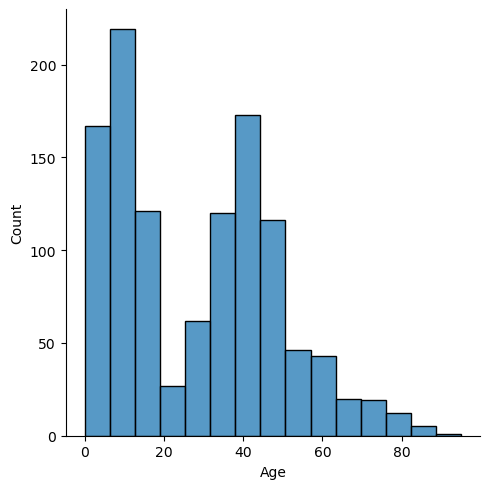

In [29]:
sns.displot(x='Age', data = df1)

In [30]:
#data cleaning 
df1['Age'].mean() #28.41
df1['Age'].fillna(df1['Age'].mean(), inplace = True)

In [31]:
#removing null values from the dataset 
df1 = df1.dropna()
df1.isnull().sum()
df1.shape 

(1269, 7)

<Axes: xlabel='Loan offer', ylabel='count'>

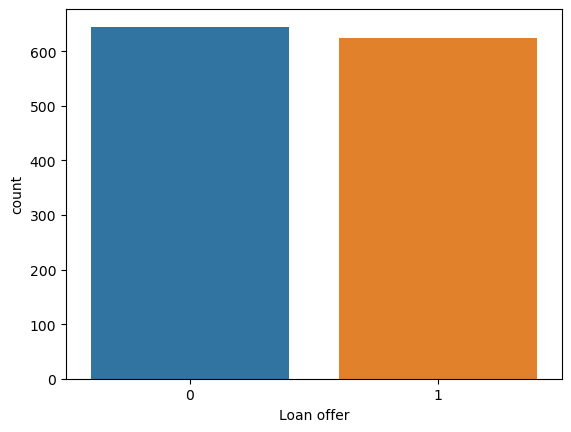

In [32]:
#countplot to see the loan possibility 
sns.countplot(x='Loan offer', data = df1) #very lil diff to get the loan in dataset

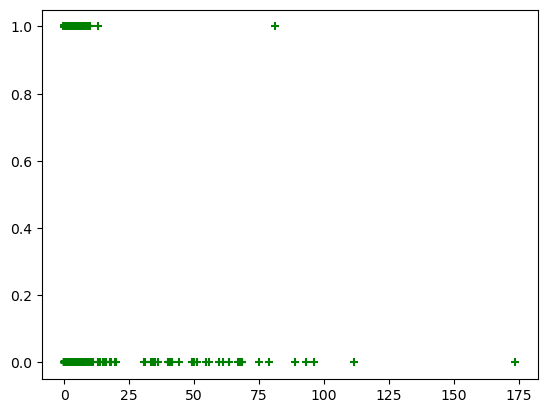

In [33]:
#using only the cibil score to build the model 
plt.scatter(df1['Cibil Score'], df1['Loan offer'], marker='+', color='green')
plt.show()

In [34]:
y.value_counts()

Sales
550000    1
565000    1
610000    1
595000    1
760000    1
810000    1
Name: count, dtype: int64

In [35]:
#seeing the accuracy of the model using statistics package
import statsmodels.api as sm
x = df1['Cibil Score']
y = df1['Loan offer'] 

#since non linear data we are adding constant 
x1 = sm.add_constant(x)
logit = sm.Logit(y,x1)
result = logit.fit()
(result.summary2(x)) #z is above 0.5 so significant 

Optimization terminated successfully.
         Current function value: 0.619081
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                                                                           Results: Logit
=====================================================================================================================================================================================================================================================================
Model:              Logit                                                                                                                                                                                                                Method:           MLE       
Dependent Variable: 0       34.940
1        0.891
2        0.330
3        0.037
4        0.038
         ...  
1335     0.576
1336     3.705
1337     0.099
1338     3.177
1339     0.688
Name: Cibil Score, Length: 1269, dtype: float64 Pseudo R-squared: 0.107     
Date:               2024-01-27 17:48                                                                                                                                                                                                     AIC:              1575.2284 
No. Observations:   1269                                                                                                                                                                                                                 BIC:              1585.5204 
Df Model:           1                                                                                                                                                                                                                    Log-Likelihood:   -785.61   
Df Residuals:       1267                                                                                                                                                                                                                 LL-Null:          -879.43   
Converged:          1.0000                                                                                                                                                                                                               LLR p-value:      1.0455e-42
No. Iterations:     7.0000                                                                                                                                                                                                               Scale:            1.0000    
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                      Coef.                                          Std.Err.                                            z                                             P>|z|                                           [0.025                                          0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                 0.6661                                           0.0825                                           8.0719                                         0.0000                                          0.5044                                          0.8279
Cibil Score                                          -0.3022                                           0.0293                                         -10.3151                                         0.0000                                         -

In [36]:
#g statistics to check the model
g= 2 *(-785.61 - (-879.43)) *10
g

1876.3999999999987

In [37]:
#chi2 to check the accuracy
import scipy
from scipy.stats import chi2
chi2.pdf(1876.3, 1) # lesser than 0.05 good model  
#this is one of the method using statistics package but here we cannot predict the f1 score 

0.0

In [38]:
#Now using sklearn package --> here no need of constant and Logit  
from sklearn.linear_model import LogisticRegression
# Create a LogisticRegression model
Lreg = LogisticRegression()

#the best model is fitted in x 
x = df1[['Cibil Score', 'Cards']]
#x= df1.iloc[:,:-1]
y = df1['Loan offer']

# Fit and predict the model
Lreg.fit(x, y)
y_predict = Lreg.predict(x)
y_predict


array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [39]:
y_pred_df= pd.DataFrame({'actual': y, 'predicted_prob': Lreg.predict(x)})
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
...,...,...
1335,1,1
1336,0,0
1337,1,1
1338,0,0


In [40]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_predict)
print (cm)

[[395 250]
 [130 494]]


Confusion matrix

 [[395 250]
 [130 494]]

True Positives(TP) =  395

True Negatives(TN) =  494

False Positives(FP) =  250

False Negatives(FN) =  130


<Axes: >

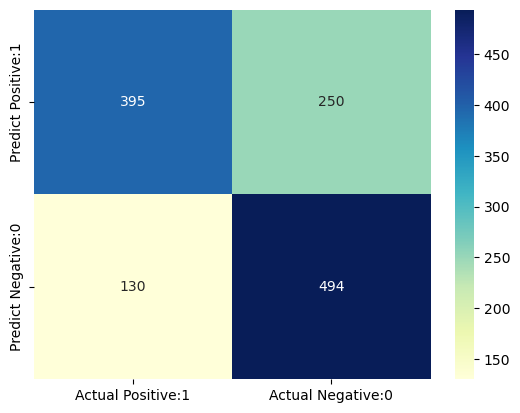

In [41]:
# visualize confusion matrix with seaborn heatmap
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [42]:
#Classification metrix
from sklearn.metrics import classification_report
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.61      0.68       645
           1       0.66      0.79      0.72       624

    accuracy                           0.70      1269
   macro avg       0.71      0.70      0.70      1269
weighted avg       0.71      0.70      0.70      1269



In [43]:
#classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7006


In [44]:
#classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2994


In [45]:
#precision score --> ratio of true positives (TP) to the sum of true and false positives (TP + FP).
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.6124


In [46]:
#recall or sensitivity --> identifies the proportion of correctly predicted actual positives.
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7524


In [47]:
#specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6640


In [48]:
#f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and worst is 0 
# Calculate the F1 score
from sklearn.metrics import f1_score 
f1 = f1_score(y, y_predict)
f1 #moderate good level model 

0.7222222222222221

In [49]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y, y_predict)
print('ROC AUC : {:.4f}'.format(ROC_AUC)) #less than 70% not good model

ROC AUC : 0.7020


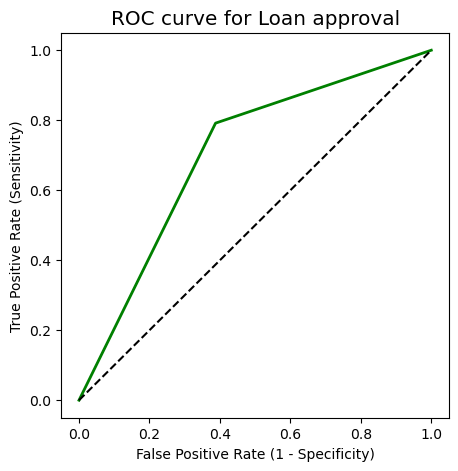

In [50]:
#ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_predict)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12

plt.title('ROC curve for Loan approval')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Comments on the result:
    Model accuracy is 70% it is not bad, it will predict the loan application moderatelty 
    The major things considered for loan approvals for this model is cibil score and the cards holded by the customer
    There is 30% of error seen in model shows that loan has been given to the customer who are not eligible 
    F1 score also noted as 72% which is good to predict the loan category but still the specificity is higher which hinder the best performance of the model in my prespective
    ROC AUC of our model approaches towards 1. So, we can conclude that our model does a good job in predicting whether we can give the loan or not to the customer 
    ROC threshold is also high 
    Overall the model does a good job to predict the outcome and the specificity is an important metric, especially when considering the balance between false positives and false negatives. Reducing the specificity could be better to obtain high accuracy in the model. 